## Цели ноутбука
1. Рассчитать доли грейдов.
2. Подсчитать суммарное число должностей и вывести 10 самых распространенных.
3. Наглядно показать распредление сотрудников по странам. 
4. Рассчитать статистические параметры распределения зарплат и построить график.

## О датасете
Этот датасет содержит 11 полей:
1. work_year: год выплаты зарплаты
2. experience_level: уровень опыта работы в течение года
3. employment_type: тип занятости для роли
4. job_title: Должность, на которой работал в течение года
5. salary: Общая сумма выплаченной зарплаты gross
6. salary_currency: Валюта выплачиваемой зарплаты в виде кода валюты по ISO 4217
7. salaryinusd: Зарплата в долларах США
8. employee_residence: основная страна проживания сотрудника в течение рабочего года в виде кода страны по ISO 3166.
9. remote_ratio: общий объем работы, выполненной удаленно.
10. company_location: Страна главного офиса или филиала, с которым контракт.
11. company_size: среднее количество людей, которые работали в компании в течение года.

Для начала импортирую все полезные библиотеки и настраиваю ноутбук

In [29]:
#install 
!pip install country_converter

# data
import pandas as pd
import numpy as np
import country_converter as coco

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
import warnings

# styling
%matplotlib inline
sns.set_theme(style="dark")
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (10.0, 7.0)
warnings.filterwarnings("ignore")

In [20]:
# загружаю данные в датафрейм и для удобства удаляю пару ненужных колонок
df = pd.read_csv("ds_salaries.csv", index_col = 0)
df.drop(df[['salary','salary_currency']],axis=1, inplace=True)
df.head(3).style.format('${:.2f}', subset='salary_in_usd')

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,$79833.00,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,$260000.00,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,$109024.00,GB,50,GB,M


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 47.4+ KB


### 1. Рассчитаем долю каждого грейда в общей выборке. 
Нам нужна колонка **Experience Level**, где  
&emsp;&emsp;EN - это Entry-level / Junior  
&emsp;&emsp;MI - Mid-level / Intermediate  
&emsp;&emsp;SE - Senior-level / Expert  
&emsp;&emsp;EX - Executive-level / Director

In [22]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-level/Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level/Expert')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level/Director')

ex_level = df['experience_level'].value_counts(normalize=True)
ex_level = round(ex_level, 3) * 100 #Выведем % каждого грейда от общей выборки
ex_level

Senior-level/Expert         46.1
Mid-level/Intermediate      35.1
Entry-level/Junior          14.5
Executive-level/Director     4.3
Name: experience_level, dtype: float64

**Видим, что специалистов уровня Senior - 46.1%, Middle - 35.1%, начинающих - 14.5%, директоров - 4.3%.**

<AxesSubplot:title={'center':'Доля каждого грейда в общей выборке'}>

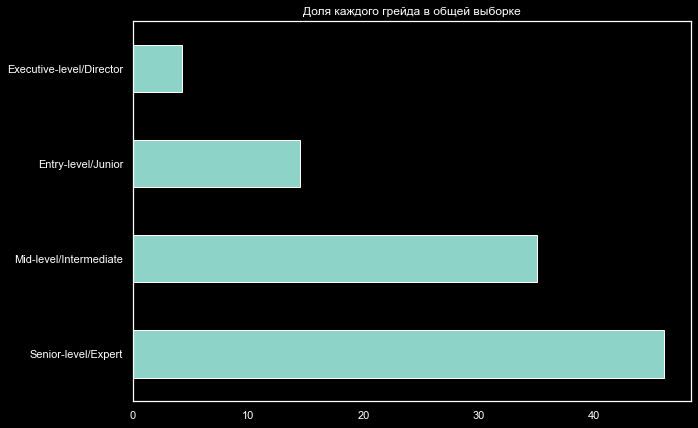

In [23]:
ex_level.plot.barh(x = ex_level.values,
                  y = ex_level.index,
                  title = 'Доля каждого грейда в общей выборке',
                  )

### 2. Подсчитать суммарное число должностей и вывести 10 самых распространенных.
Работаем с колонкой **Job_title.**

In [24]:
print('Всего в датасете представлены данные по', df['job_title'].value_counts().size , 'должностям.')

Всего в датасете представлены данные по 50 должностям.


<AxesSubplot:title={'center':'ТОП-10 профессий по численности'}>

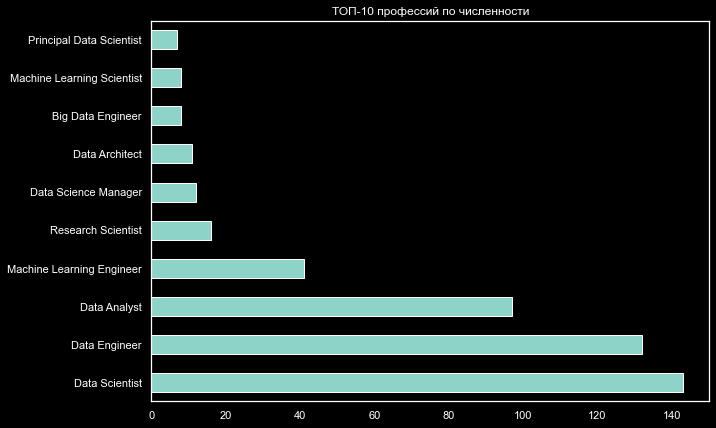

In [25]:
top10_job_title = df['job_title'].value_counts()[:10]
top10_job_title.plot.barh(x = top10_job_title.index, 
                         y = top10_job_title.values, 
                         title = 'ТОП-10 профессий по численности', 
                          #rot = -90,
                         )

### 3. Наглядно показать распредление сотрудников по странам.
Здесь будем работать с колонкой **Employee_residence**, в которой записана страна проживания сотрудника в виде кода страны по ISO 3166. Предварительно в начале ноутбука уже прописана установка модуля **country_converter**, который поможет декодировать эти значения.

<AxesSubplot:title={'center':'Где проживают сотрудники'}>

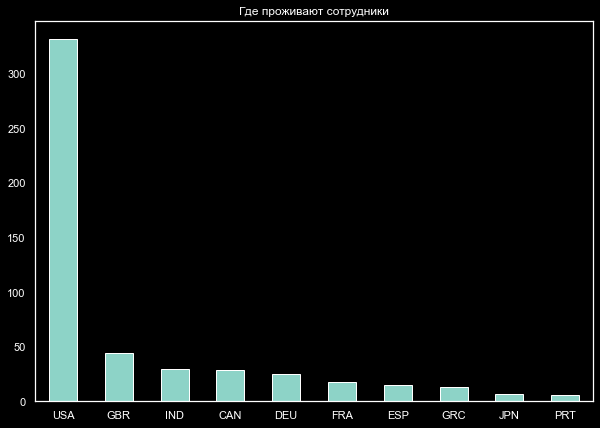

In [26]:
df['employee_residence'] = coco.convert(names = df['employee_residence'], to = 'ISO3')
residence = df['employee_residence'].value_counts()[:10]
residence.plot.bar(x = residence.index, 
                         y = residence.values, 
                         title = 'Где проживают сотрудники', 
                         rot = 0,
                         )

**Большинство работников находятся в США.** Остальные значения идут с большим отрывом. Поэтому **для наглядности прологарифмируем значения численности** и заново выведем этот же график.

<AxesSubplot:title={'center':'Где проживают сотрудники'}, ylabel='Численность, log(чел)'>

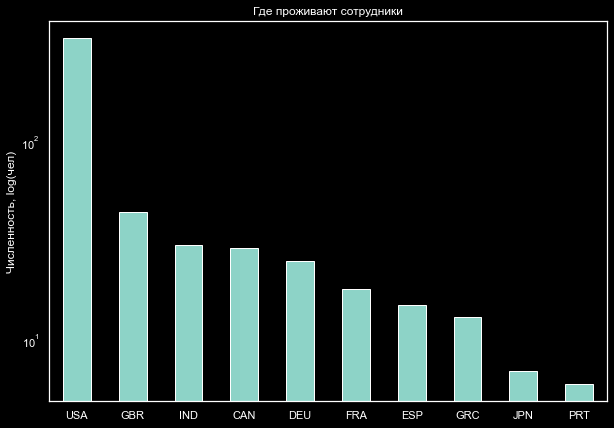

In [27]:
residence.plot.bar(x = residence.index, 
                         y = residence.values, 
                         title = 'Где проживают сотрудники', 
                         rot = 0,
                         logy = True,
                         ylabel = 'Численность, log(чел)',
                         )

### 4. Рассчитать статистические параметры распределения зарплат и построить график.

Базовые метрики
count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64
--------------------------------
Самые популярные значения, топ-5
100000    15
120000    12
150000    12
200000    10
135000     9
Name: salary_in_usd, dtype: int64
--------------------------------
Эксцесс 6.291709208027671
Ассиметрия 1.6634213360977623


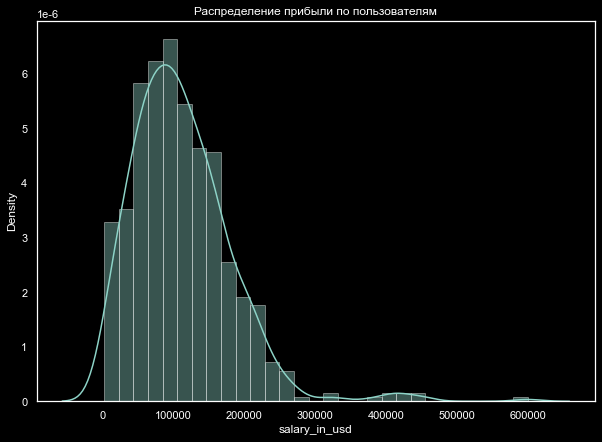

In [28]:
def my_basic_research(df,column):
    print('Базовые метрики')
    print(df[column].describe())
    print('--------------------------------') 
          
    print('Самые популярные значения, топ-5')
    print(df[column].value_counts().nlargest(5))
    print('--------------------------------') 
          
    print('Эксцесс', kurtosis(df[column]))
    print('Ассиметрия', skew(df[column]))
          
    sns.distplot(df[column])
    plt.title('Распределение прибыли по пользователям')
    
#Применю эту функцию к колонке salary_in_usd
my_basic_research(df,'salary_in_usd')

**Видно, что распределение смещено вправо и имеет острый пик у среднего значения. Мода (100 000) и медиана (101 570) близки, но от среднего (112 298) отличаются.**